# Bias and fairness audit
This notebook executes a bia and fairness autdit for the XXXX model using Aequitas  
For a full overview of how to interpret these results see [Link](https://github.com/dssg/aequitas/blob/master/docs/source/examples/compas_demo.ipynb)


In [69]:
import pandas as pd
import os
import seaborn as sns

from aequitas.plotting import Plot
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness

from sklearn.model_selection import train_test_split

from ml.data import load_data, process_data
from ml.model import load_model_artifacts, inference

%matplotlib inline

# Enable Pandas to display dataframes without restriction.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import 

### Development data

In [6]:
data = load_data(os.path.join(os.getcwd(), "raw_data", "census.csv"))
data.head(5)

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Model artifacts

In [23]:
rf_model, encoder, lb = load_model_artifacts(os.path.join(os.getcwd(),"model_artifacts"))

# Preprocess the data 

In [37]:
# Split into train and test, as we seed the random number generate, the samples will be consistent
train, test = train_test_split(data, test_size=0.20, random_state = 831)

# Reset the indicies for consistent merging
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

In [40]:
# Transform the test data
cat_features = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country"
]

X_test, y_test, encoder, lb = process_data(
        test, categorical_features=cat_features, label="salary", training=False, encoder = encoder, lb = lb
)

In [41]:
# Get the predictions for the test dataset
y_test_preds = inference(rf_model, X_test)

# Create the Aequitas input dataframe
As per the slice analysis, for expediancy just run for categorical features

In [57]:
df_aq = test[cat_features + ['salary']].copy(deep = True)
df_aq['label_value'] = df_aq['salary'].apply(lambda x: 0 if x == "<=50K" else 1)
df_aq['score'] = pd.Series(y_test_preds)
df_aq.pop('salary')
df_aq.head(50)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,label_value,score
0,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,United-States,0,0
1,Private,Bachelors,Never-married,Sales,Not-in-family,White,Male,United-States,0,0
2,Private,Bachelors,Never-married,Handlers-cleaners,Not-in-family,White,Male,United-States,0,0
3,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,China,0,0
4,Federal-gov,Some-college,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0,0
5,Private,Some-college,Separated,Tech-support,Unmarried,White,Female,Columbia,0,0
6,Private,Some-college,Married-spouse-absent,Adm-clerical,Unmarried,White,Female,United-States,0,0
7,Private,Some-college,Never-married,Adm-clerical,Other-relative,Black,Female,Jamaica,0,0
8,Private,Some-college,Married-civ-spouse,Other-service,Wife,White,Female,United-States,0,0
9,Private,10th,Married-spouse-absent,Adm-clerical,Unmarried,White,Female,Mexico,0,0


# Run the Aequitas analyis

In [73]:
# Get the group dataset
group = Group()
xtab, idxs = group.get_crosstabs(df_aq)
xtab

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,0,binary 0/1,838,workclass,?,0.282051,0.985507,0.076087,0.312500,0.014493,0.717949,0.923913,0.687500,16,368,0.019093,0.041667,5,28,340,11,39,345,384,6513,0.101562
1,0,binary 0/1,838,workclass,Federal-gov,0.384615,0.948276,0.266667,0.193548,0.051724,0.615385,0.733333,0.806452,31,150,0.036993,0.171271,6,40,110,25,65,116,181,6513,0.359116
2,0,binary 0/1,838,workclass,Local-gov,0.455882,0.962585,0.207283,0.150685,0.037415,0.544118,0.792717,0.849315,73,357,0.087112,0.169767,11,74,283,62,136,294,430,6513,0.316279
3,0,binary 0/1,838,workclass,Never-worked,NaN,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,0,1,0.000000,0.000000,0,0,1,0,0,1,1,6513,0.000000
4,0,binary 0/1,838,workclass,Private,0.419291,0.978181,0.145967,0.153082,0.021819,0.580709,0.854033,0.846918,503,4042,0.600239,0.110671,77,590,3452,426,1016,3529,4545,6513,0.223542
5,0,binary 0/1,838,workclass,Self-emp-inc,0.504425,0.896907,0.391608,0.149254,0.103093,0.495575,0.608392,0.850746,67,143,0.079952,0.319048,10,56,87,57,113,97,210,6513,0.538095
6,0,binary 0/1,838,workclass,Self-emp-not-inc,0.496241,0.929775,0.168342,0.274725,0.070225,0.503759,0.831658,0.725275,91,398,0.108592,0.186094,25,67,331,66,133,356,489,6513,0.271984
7,0,binary 0/1,838,workclass,State-gov,0.620253,0.958115,0.140845,0.140351,0.041885,0.379747,0.859155,0.859649,57,213,0.068019,0.211111,8,30,183,49,79,191,270,6513,0.292593
8,0,binary 0/1,838,workclass,Without-pay,NaN,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,0,3,0.000000,0.000000,0,0,3,0,0,3,3,6513,0.000000
9,0,binary 0/1,838,education,10th,0.000000,1.000000,0.054726,NaN,0.000000,1.000000,0.945274,NaN,0,201,0.000000,0.000000,0,11,190,0,11,190,201,6513,0.054726


In [71]:
# Get the bias dataset
bias = Bias()
bias_df = bias.get_disparity_major_group(xtab, 
                                         original_df=df_aq, 
                                         alpha=0.05, 
                                         mask_significance=True)
bias_df

get_disparity_major_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,0,binary 0/1,838,workclass,?,0.282051,0.985507,0.076087,0.312500,0.014493,0.717949,0.923913,0.687500,16,368,0.019093,0.041667,5,28,340,11,39,345,384,6513,0.101562,0.031809,0.376491,0.811766,2.041396,0.521260,0.664220,1.236332,0.672686,1.007490,1.081824,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
1,0,binary 0/1,838,workclass,Federal-gov,0.384615,0.948276,0.266667,0.193548,0.051724,0.615385,0.733333,0.806452,31,150,0.036993,0.171271,6,40,110,25,65,116,181,6513,0.359116,0.061630,1.547565,0.952219,1.264349,1.826893,2.370578,1.059713,0.917299,0.969428,0.858671,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
2,0,binary 0/1,838,workclass,Local-gov,0.455882,0.962585,0.207283,0.150685,0.037415,0.544118,0.792717,0.849315,73,357,0.087112,0.169767,11,74,283,62,136,294,430,6513,0.316279,0.145129,1.533982,1.002830,0.984344,1.420064,1.714772,0.936989,1.087269,0.984056,0.928205,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
3,0,binary 0/1,838,workclass,Never-worked,NaN,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,0,1,0.000000,0.000000,0,0,1,0,0,1,1,6513,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,1.022306,1.170915,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
4,0,binary 0/1,838,workclass,Private,0.419291,0.978181,0.145967,0.153082,0.021819,0.580709,0.854033,0.846918,503,4042,0.600239,0.110671,77,590,3452,426,1016,3529,4545,6513,0.223542,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
5,0,binary 0/1,838,workclass,Self-emp-inc,0.504425,0.896907,0.391608,0.149254,0.103093,0.495575,0.608392,0.850746,67,143,0.079952,0.319048,10,56,87,57,113,97,210,6513,0.538095,0.133201,2.882846,1.004520,0.974995,2.682849,4.724863,0.853397,1.203041,0.916914,0.712375,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
6,0,binary 0/1,838,workclass,Self-emp-not-inc,0.496241,0.929775,0.168342,0.274725,0.070225,0.503759,0.831658,0.725275,91,398,0.108592,0.186094,25,67,331,66,133,356,489,6513,0.271984,0.180915,1.681506,0.856369,1.794634,1.153283,3.218481,0.867491,1.183522,0.950515,0.973802,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
7,0,binary 0/1,838,workclass,State-gov,0.620253,0.958115,0.140845,0.140351,0.041885,0.379747,0.859155,0.859649,57,213,0.068019,0.211111,8,30,183,49,79,191,270,6513,0.292593,0.113320,1.907555,1.015032,0.916838,0.964908,1.919630,0.653937,1.479289,0.979487,1.005998,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
8,0,binary 0/1,838,workclass,Without-pay,NaN,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,0,3,0.000000,0.000000,0,0,3,0,0,3,3,6513,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,1.022306,1.170915,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private
9,0,binary 0/1,838,education,10th,0.000000,1.000000,0.054726,NaN,0.000000,1.000000,0.945274,NaN,0,201,0.000000,0.000000,0,11,190,0,11,190,201,6513,0.054726,0.000000,0.000000,NaN,NaN,0.389144,0.000000,1.171429,0.000000,1.000584,1.099965,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad


In [74]:
# Get the fairness dataset
fairness = Fairness()
fairness_df = fairness.get_group_value_fairness(bias_df)
fairness_df

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,838,workclass,?,0.282051,0.985507,0.076087,0.312500,0.014493,0.717949,0.923913,0.687500,16,368,0.019093,0.041667,5,28,340,11,39,345,384,6513,0.101562,0.031809,0.376491,0.811766,2.041396,0.521260,0.664220,1.236332,0.672686,1.007490,1.081824,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False
1,0,binary 0/1,838,workclass,Federal-gov,0.384615,0.948276,0.266667,0.193548,0.051724,0.615385,0.733333,0.806452,31,150,0.036993,0.171271,6,40,110,25,65,116,181,6513,0.359116,0.061630,1.547565,0.952219,1.264349,1.826893,2.370578,1.059713,0.917299,0.969428,0.858671,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False
2,0,binary 0/1,838,workclass,Local-gov,0.455882,0.962585,0.207283,0.150685,0.037415,0.544118,0.792717,0.849315,73,357,0.087112,0.169767,11,74,283,62,136,294,430,6513,0.316279,0.145129,1.533982,1.002830,0.984344,1.420064,1.714772,0.936989,1.087269,0.984056,0.928205,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,False,False,True,False,False,True,True,True,True,True,False,False,False,False,False
3,0,binary 0/1,838,workclass,Never-worked,NaN,1.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,0,1,0.000000,0.000000,0,0,1,0,0,1,1,6513,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,1.022306,1.170915,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,False,False,NaN,False,False,NaN,NaN,True,True,NaN,False,False,False,False,False
4,0,binary 0/1,838,workclass,Private,0.419291,0.978181,0.145967,0.153082,0.021819,0.580709,0.854033,0.846918,503,4042,0.600239,0.110671,77,590,3452,426,1016,3529,4545,6513,0.223542,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,0,binary 0/1,838,workclass,Self-emp-inc,0.504425,0.896907,0.391608,0.149254,0.103093,0.495575,0.608392,0.850746,67,143,0.079952,0.319048,10,56,87,57,113,97,210,6513,0.538095,0.133201,2.882846,1.004520,0.974995,2.682849,4.724863,0.853397,1.203041,0.916914,0.712375,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,False,False,True,False,False,True,True,True,False,True,False,False,False,False,False
6,0,binary 0/1,838,workclass,Self-emp-not-inc,0.496241,0.929775,0.168342,0.274725,0.070225,0.503759,0.831658,0.725275,91,398,0.108592,0.186094,25,67,331,66,133,356,489,6513,0.271984,0.180915,1.681506,0.856369,1.794634,1.153283,3.218481,0.867491,1.183522,0.950515,0.973802,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,False,False,False,False,True,True,True,True,True,True,False,True,False,False,False
7,0,binary 0/1,838,workclass,State-gov,0.620253,0.958115,0.140845,0.140351,0.041885,0.379747,0.859155,0.859649,57,213,0.068019,0.211111,8,30,183,49,79,191,270,6513,0.292593,0.113320,1.907555,1.015032,0.916838,0.964908,1.919630,0.653937,1.479289,0.979487,1.005998,Private,Private,Private,Private,Priv

Model is not fair acorss  
* Unsupervised Fairness: Fairness in both Statistical Parity and Impact Parity
    * Statistical parity requires that easch groups is epresented equally 
    * Statistical parity requires that a classifier gives equal probability with respect to a target variable, independent of whether a subject is or is not contained within a protected group
* Supervised Fairness: Fairness in both Type I and Type II Parity
    * Each group has proportionalty equal type 1 (false positive) and type 2 (false negative) rates made by the model
* Overall Fairness: Fairness across all parities for all attributes

In [61]:
# Get overall fairness
overall_fairness = fairness.get_overall_fairness(fairness_df)
print(overall_fairness)

{'Unsupervised Fairness': False, 'Supervised Fairness': False, 'Overall Fairness': False}


# Visualise disparities
False positive - The model predicts the individual **IS** wealthy but they are not  
False negative - The model predicts the individual **IS NOT** weathy but they are 

The model is ...
* 1.27 times more likely to incorrectly predict a black individual has a lower income when compared to a white individual
* 1.65 times more likely to incorrectly predict a female individual has a lower income when compared to a male individual
* generally more likely to incorrectly predict individual from "non-professinal" occupation (i.e. machine operator, service, cleaner) has a lower income when compared to a "prfessoinal" occupation


In [75]:
aqp = Plot()

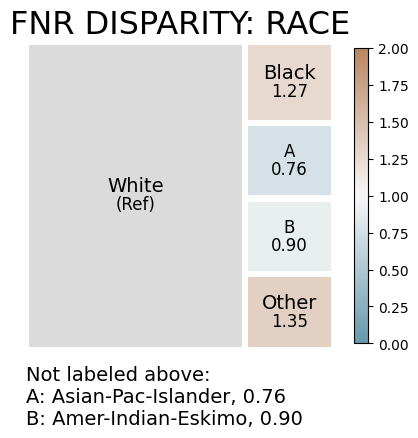

In [83]:
aqp.plot_disparity(bias_df, group_metric='fnr_disparity', attribute_name='race', significance_alpha=0.05)

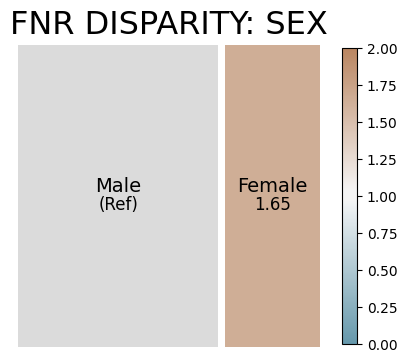

In [84]:
aqp.plot_disparity(bias_df, group_metric='fnr_disparity', attribute_name='sex', significance_alpha=0.05)

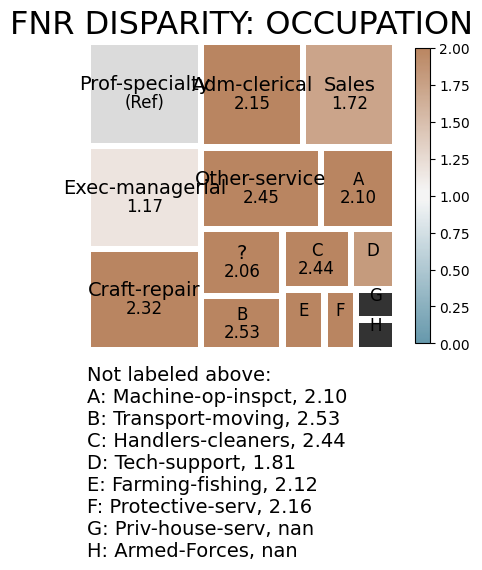

In [85]:
aqp.plot_disparity(bias_df, group_metric='fnr_disparity', attribute_name='occupation', significance_alpha=0.05)

IndexError: list index out of range

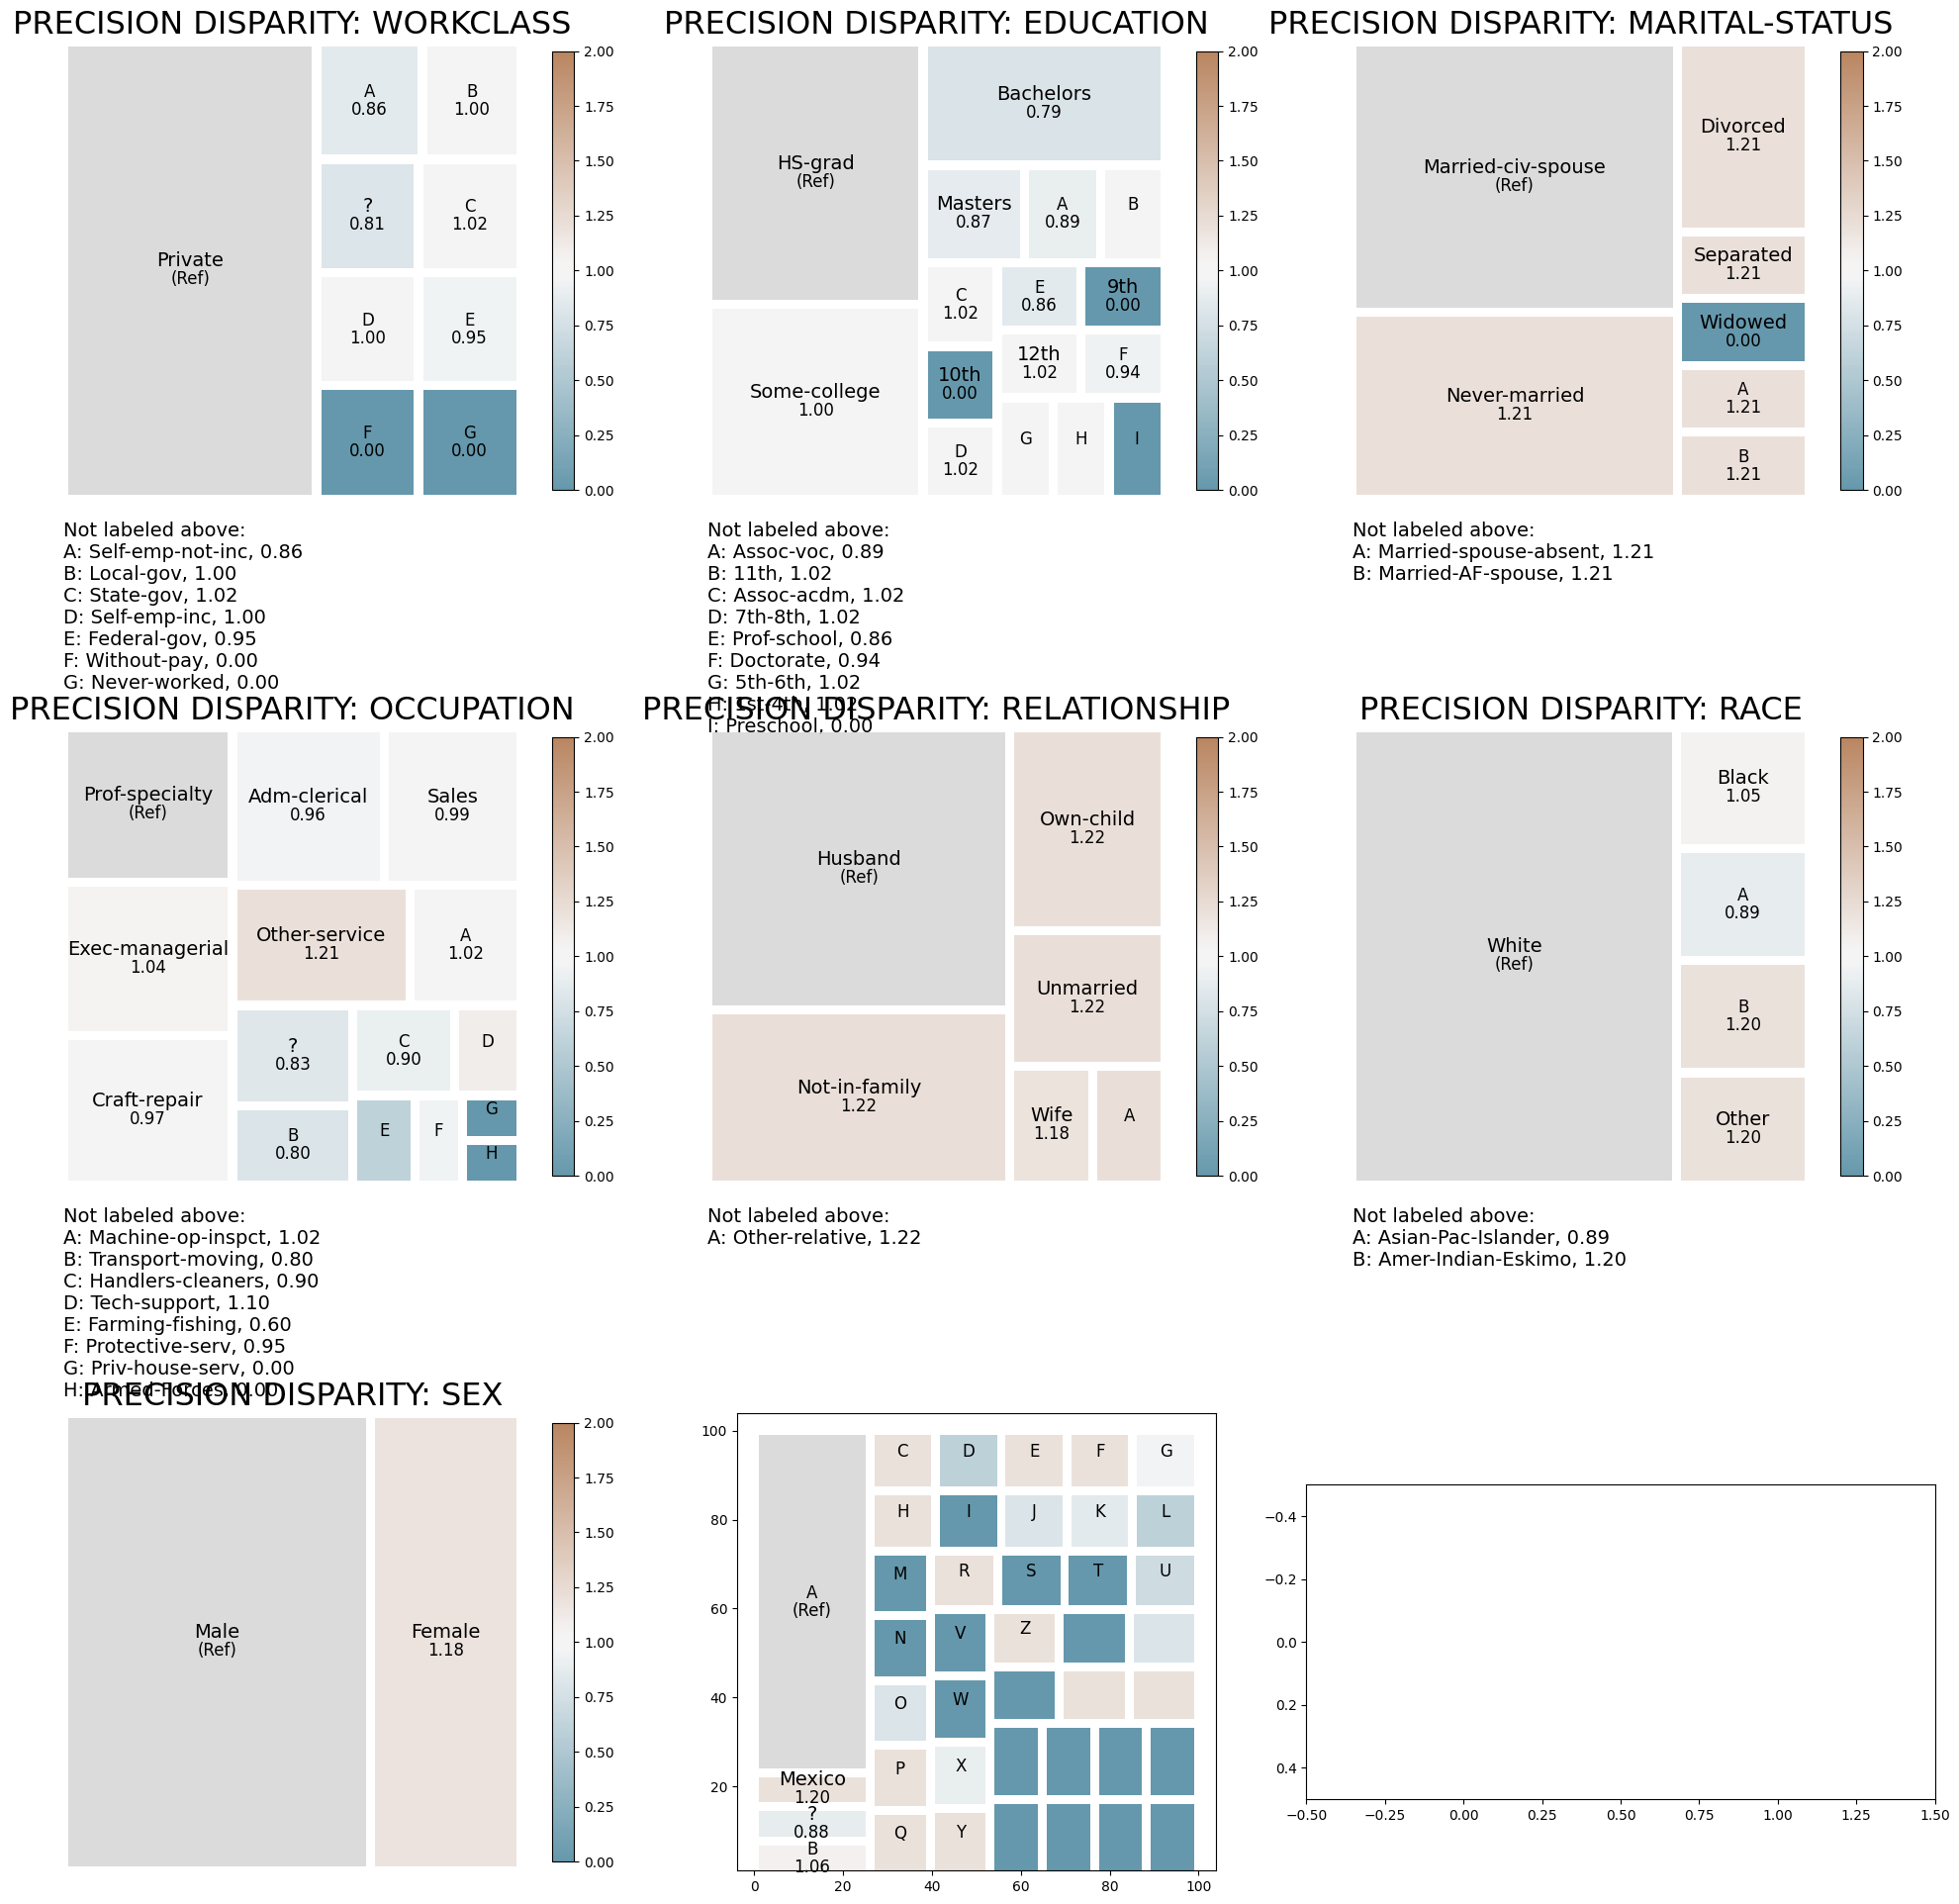

In [81]:
aqp.plot_disparity_all(bias_df, metrics=['precision_disparity'], significance_alpha=0.05)

In [63]:
metrics = ['fpr', "for", "fnr"]
disparity_metrics = [f"{metric}_disparity" for metric in metrics]
print(disparity_metrics)

# To avoid issues when plotting, add an epsilon (0.000001) to cases where statistics are zero or NAN
eps = 0.000001
bias_df[disparity_metrics] = bias_df[disparity_metrics].fillna(0.0) + eps

# Just as we discussed above, some statistics are zero or NAN
bias_df[["attribute_name", "attribute_value"] + metrics + disparity_metrics]

['fpr_disparity', 'for_disparity', 'fnr_disparity']


,attribute_name,attribute_value,fpr,for,fnr,fpr_disparity,for_disparity,fnr_disparity
0,workclass,?,0.014493,0.076087,0.717949,0.664221,0.521261,1.236333
1,workclass,Federal-gov,0.051724,0.266667,0.615385,2.370579,1.826894,1.059714
2,workclass,Local-gov,0.037415,0.207283,0.544118,1.714773,1.420065,0.936990
3,workclass,Never-worked,0.000000,0.000000,NaN,0.000001,0.000001,0.000001
4,workclass,Private,0.021819,0.145967,0.580709,1.000001,1.000001,1.000001
5,workclass,Self-emp-inc,0.103093,0.391608,0.495575,4.724864,2.682850,0.853398
6,workclass,Self-emp-not-inc,0.070225,0.168342,0.503759,3.218482,1.153284,0.867492
7,workclass,State-gov,0.041885,0.140845,0.379747,1.919631,0.964909,0.653938
8,workclass,Without-pay,0.000000,0.000000,NaN,0.000001,0.000001,0.000001
9,education,10th,0.000000,0.054726,1.000000,0.000001,0.389145,1.171430


IndexError: list index out of range

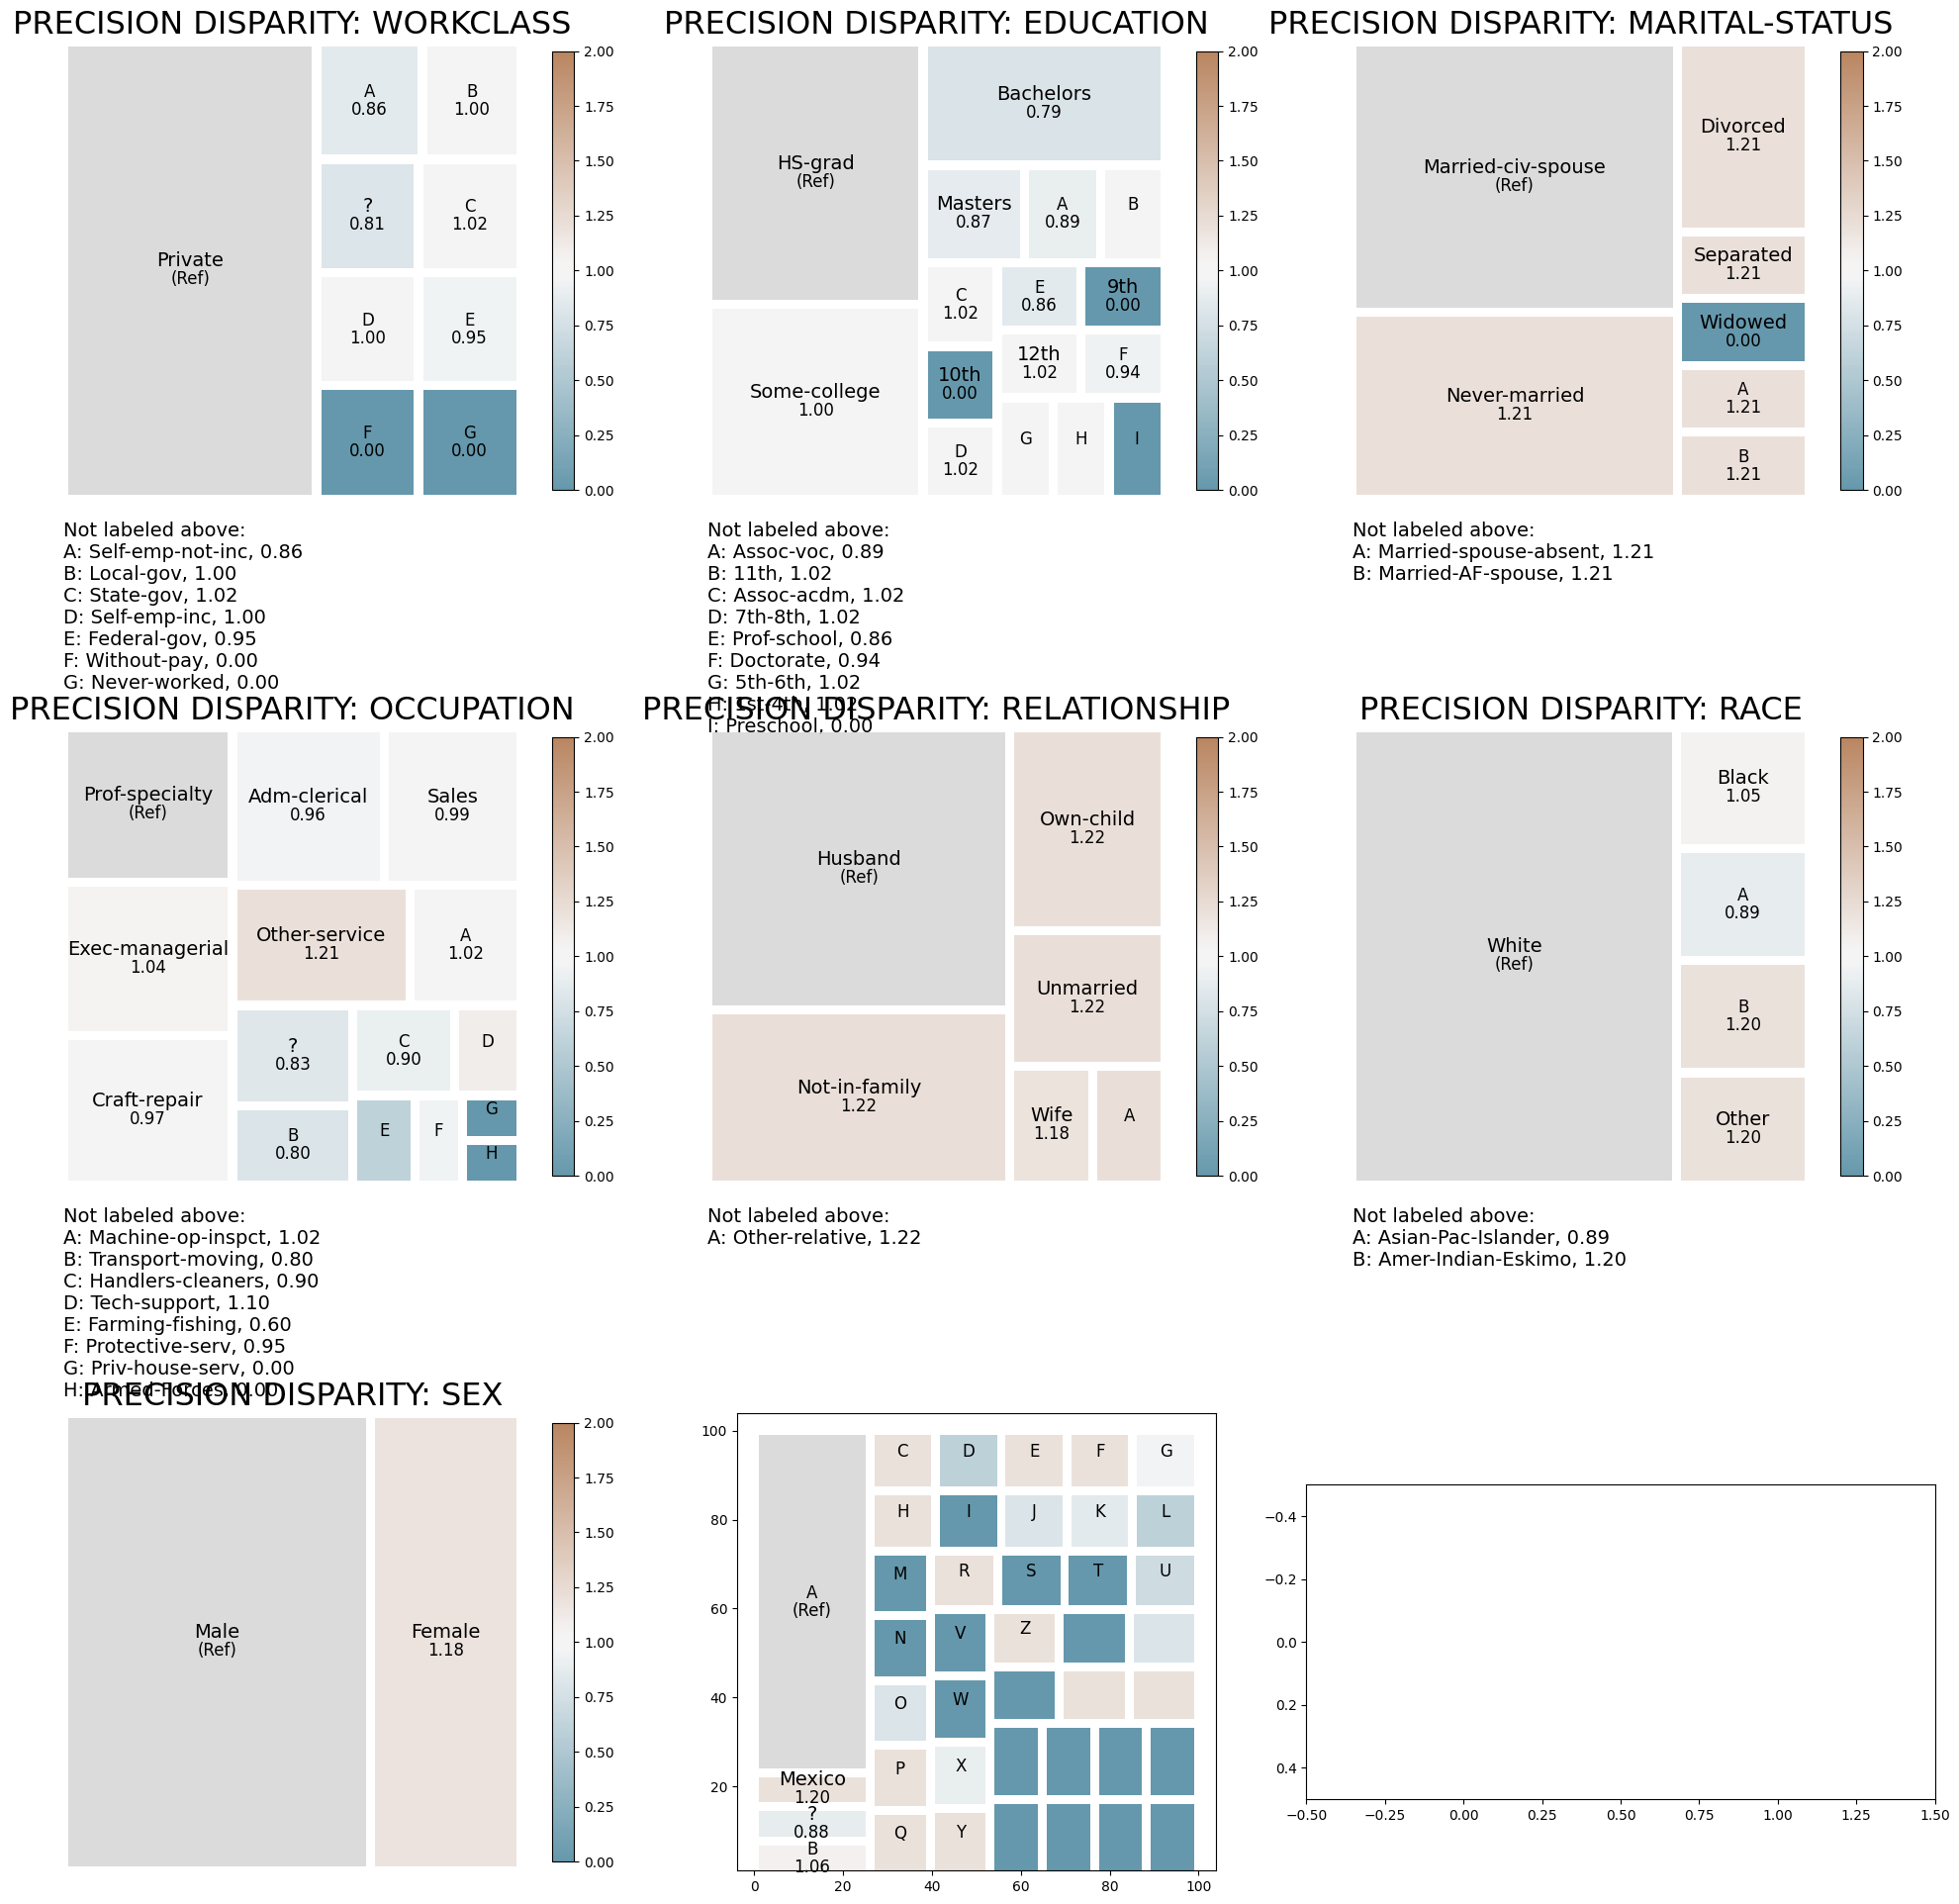

In [66]:
disparity_tolerance = 1.25

# Deprecated function summary()
# ap.summary(bias_df, metrics, fairness_threshold=disparity_tolerance)

# Aequitas Fairness() class provides a few functions that provide a high level summary of fairness and disparity, such as 
# plot_fairness_group()
# plot_fairness_group_all()
# plot_fairness_disparity()
# plot_fairness_disparity_all()
# plot_disparity()
# To interpret this, see https://github.com/dssg/aequitas/blob/master/docs/source/examples/compas_demo.ipynb


p = ap.plot_disparity_all(bias_df, metrics=['precision_disparity'], significance_alpha=0.05)

In [ ]:
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################

In [8]:
# Race is our protected class that we will be exploring
df["race"].value_counts()

African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64

In [9]:
# Remove the races that have very little data in this data.
df = df[~df["race"].isin(["Asian", "Native American"])]

# Create Crosstab
Create the crosstab that forms the basis for all the subsequent analyses.  
This is basically model performance stats by all the possible slices

In [11]:
group = Group()
xtab, feat_idx = group.get_crosstabs(df)

print(feat_idx)
xtab.head(10)

Index(['race', 'sex', 'age_cat'], dtype='object')


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,0,binary 0/1,3297,race,African-American,0.720147,0.551532,0.349540,0.370285,0.448468,0.279853,0.650460,0.629715,2174,1522,0.659387,0.588203,805,532,990,1369,1901,1795,3696,7164,0.514340
1,0,binary 0/1,3297,race,Caucasian,0.522774,0.765457,0.288125,0.408665,0.234543,0.477226,0.711875,0.591335,854,1600,0.259023,0.348003,349,461,1139,505,966,1488,2454,7164,0.393643
2,0,binary 0/1,3297,race,Hispanic,0.443966,0.785185,0.288591,0.457895,0.214815,0.556034,0.711409,0.542105,190,447,0.057628,0.298273,87,129,318,103,232,405,637,7164,0.364207
3,0,binary 0/1,3297,race,Other,0.323308,0.852459,0.302013,0.455696,0.147541,0.676692,0.697987,0.544304,79,298,0.023961,0.209549,36,90,208,43,133,244,377,7164,0.352785
4,0,binary 0/1,3297,sex,Female,0.607287,0.678212,0.242197,0.489796,0.321788,0.392713,0.757803,0.510204,588,801,0.178344,0.423326,288,194,607,300,494,895,1389,7164,0.355652
5,0,binary 0/1,3297,sex,Male,0.628196,0.674350,0.332029,0.365079,0.325650,0.371804,0.667971,0.634921,2709,3066,0.821656,0.469091,989,1018,2048,1720,2738,3037,5775,7164,0.474113
6,0,binary 0/1,3297,age_cat,25 - 45,0.625399,0.665607,0.324885,0.384736,0.334393,0.374601,0.675115,0.615264,1913,2170,0.580224,0.468528,736,705,1465,1177,1882,2201,4083,7164,0.460936
7,0,binary 0/1,3297,age_cat,Greater than 45,0.424797,0.830841,0.241468,0.464103,0.169159,0.575203,0.758532,0.535897,390,1172,0.118289,0.249680,181,283,889,209,492,1070,1562,7164,0.314981
8,0,binary 0/1,3297,age_cat,Less than 25,0.738928,0.455371,0.426667,0.362173,0.544629,0.261072,0.573333,0.637827,994,525,0.301486,0.654378,360,224,301,634,858,661,1519,7164,0.564845


Abbev. | Name
--- | ---
tpr | True Positive Rate
tnr | True Negative Rate
for |False Omission Rate
fdr | False Discovery Rate
fpr | False Positive Rate
fnr | False Negative Rate
npv | Negative Predictive Value
pp | Predicted Positive Count
pn | Predicted Negative Count
ppr | Predicted Positive Ratio_k
pprev | Predicted Positive Ratio_g
fp | False Postives
fn | False Negatives
tn | True Negatives
tp | True Positives
prev | Group Prevalance

# Compute Bias
This uses the crosstab from the previous step  
We calculate the bias vs. a predefined group we manually set via the ref_groups_dict argument  
This produces many of the same columns as before BUT also extra columens suffixed `_disparity`, giving dispatify relative to the reference group 

In [12]:
bias = Bias()
bias_df = bias.get_disparity_predefined_groups(xtab,
                                               original_df=df,
                                               ref_groups_dict={"race": "Caucasian", "sex": "Male", "age_cat": "25 - 45"},
                                               alpha=0.05,
                                               mask_significance=True)
bias_df.head(10)

get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,0,binary 0/1,3297,race,African-American,0.720147,0.551532,0.349540,0.370285,0.448468,0.279853,0.650460,0.629715,2174,1522,0.659387,0.588203,805,532,990,1369,1901,1795,3696,7164,0.514340,2.545667,1.690224,1.064904,0.906085,1.213154,1.912093,0.586416,1.377549,0.720526,0.913728,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
1,0,binary 0/1,3297,race,Caucasian,0.522774,0.765457,0.288125,0.408665,0.234543,0.477226,0.711875,0.591335,854,1600,0.259023,0.348003,349,461,1139,505,966,1488,2454,7164,0.393643,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
2,0,binary 0/1,3297,race,Hispanic,0.443966,0.785185,0.288591,0.457895,0.214815,0.556034,0.711409,0.542105,190,447,0.057628,0.298273,87,129,318,103,232,405,637,7164,0.364207,0.222482,0.857099,0.916748,1.120464,1.001616,0.915887,1.165140,0.849249,1.025773,0.999346,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
3,0,binary 0/1,3297,race,Other,0.323308,0.852459,0.302013,0.455696,0.147541,0.676692,0.697987,0.544304,79,298,0.023961,0.209549,36,90,208,43,133,244,377,7164,0.352785,0.092506,0.602147,0.920466,1.115085,1.048203,0.629057,1.417970,0.618447,1.113660,0.980490,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
4,0,binary 0/1,3297,sex,Female,0.607287,0.678212,0.242197,0.489796,0.321788,0.392713,0.757803,0.510204,588,801,0.178344,0.423326,288,194,607,300,494,895,1389,7164,0.355652,0.217054,0.902439,0.803571,1.341615,0.729447,0.988139,1.056235,0.966717,1.005728,1.134484,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
5,0,binary 0/1,3297,sex,Male,0.628196,0.674350,0.332029,0.365079,0.325650,0.371804,0.667971,0.634921,2709,3066,0.821656,0.469091,989,1018,2048,1720,2738,3037,5775,7164,0.474113,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
6,0,binary 0/1,3297,age_cat,25 - 45,0.625399,0.665607,0.324885,0.384736,0.334393,0.374601,0.675115,0.615264,1913,2170,0.580224,0.468528,736,705,1465,1177,1882,2201,4083,7164,0.460936,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45
7,0,binary 0/1,3297,age_cat,Greater than 45,0.424797,0.830841,0.241468,0.464103,0.169159,0.575203,0.758532,0.535897,390,1172,0.118289,0.249680,181,283,889,209,492,1070,1562,7164,0.314981,0.203868,0.532903,0.871004,1.206288,0.743241,0.505868,1.535507,0.679242,1.248247,1.123560,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45
8,0,binary 0/1,3297,age_cat,Less than 25,0.738928,0.455371,0.426667,0.362173,0.544629,0.261072,0.573333,0.637827,994,525,0.301486,0.654378,360,224,301,634,858,661,1519,7164,0.564845,0.519603,1.396667,1.036672,0.941355,1.313286,1.628708,0.696933,1.181531,0.684144,0.849238,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45


Another common option is to use the `get_disparity_major_group` method      
This sets the reference group as being the majority group iin the data  
In our instance african american males in the 25-45 age group

In [13]:
bias.get_disparity_major_group(xtab,
                               original_df=df,
                               alpha=0.05,
                               mask_significance=True).head(10)

get_disparity_major_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,0,binary 0/1,3297,race,African-American,0.720147,0.551532,0.349540,0.370285,0.448468,0.279853,0.650460,0.629715,2174,1522,0.659387,0.588203,805,532,990,1369,1901,1795,3696,7164,0.514340,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American
1,0,binary 0/1,3297,race,Caucasian,0.522774,0.765457,0.288125,0.408665,0.234543,0.477226,0.711875,0.591335,854,1600,0.259023,0.348003,349,461,1139,505,966,1488,2454,7164,0.393643,0.392824,0.591638,0.939052,1.103650,0.824297,0.522987,1.705274,0.725927,1.387874,1.094418,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American
2,0,binary 0/1,3297,race,Hispanic,0.443966,0.785185,0.288591,0.457895,0.214815,0.556034,0.711409,0.542105,190,447,0.057628,0.298273,87,129,318,103,232,405,637,7164,0.364207,0.087397,0.507092,0.860874,1.236600,0.825630,0.478997,1.986883,0.616493,1.423644,1.093702,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American
3,0,binary 0/1,3297,race,Other,0.323308,0.852459,0.302013,0.455696,0.147541,0.676692,0.697987,0.544304,79,298,0.023961,0.209549,36,90,208,43,133,244,377,7164,0.352785,0.036339,0.356253,0.864366,1.230663,0.864031,0.328989,2.418028,0.448947,1.545620,1.073066,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American
4,0,binary 0/1,3297,sex,Female,0.607287,0.678212,0.242197,0.489796,0.321788,0.392713,0.757803,0.510204,588,801,0.178344,0.423326,288,194,607,300,494,895,1389,7164,0.355652,0.217054,0.902439,0.803571,1.341615,0.729447,0.988139,1.056235,0.966717,1.005728,1.134484,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
5,0,binary 0/1,3297,sex,Male,0.628196,0.674350,0.332029,0.365079,0.325650,0.371804,0.667971,0.634921,2709,3066,0.821656,0.469091,989,1018,2048,1720,2738,3037,5775,7164,0.474113,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
6,0,binary 0/1,3297,age_cat,25 - 45,0.625399,0.665607,0.324885,0.384736,0.334393,0.374601,0.675115,0.615264,1913,2170,0.580224,0.468528,736,705,1465,1177,1882,2201,4083,7164,0.460936,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45
7,0,binary 0/1,3297,age_cat,Greater than 45,0.424797,0.830841,0.241468,0.464103,0.169159,0.575203,0.758532,0.535897,390,1172,0.118289,0.249680,181,283,889,209,492,1070,1562,7164,0.314981,0.203868,0.532903,0.871004,1.206288,0.743241,0.505868,1.535507,0.679242,1.248247,1.123560,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45
8,0,binary 0/1,3297,age_cat,Less than 25,0.738928,0.455371,0.426667,0.362173,0.544629,0.261072,0.573333,0.637827,994,525,0.301486,0.654378,360,224,301,634,858,661,1519,7164,0.564845,0.519603,1.396667,1.036672,0.941355,1.313286,1.628708,0.696933,1.181531,0.684144,0.849238,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45


# Compute fairness
This uses the bias dataframe from the previous step  
This produces the same valoues fropm before but give a lot more parity and fairness stats

In [14]:
fairness = Fairness()
fairness_df = fairness.get_group_value_fairness(bias_df)
fairness_df.head(10)

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,3297,race,African-American,0.720147,0.551532,0.349540,0.370285,0.448468,0.279853,0.650460,0.629715,2174,1522,0.659387,0.588203,805,532,990,1369,1901,1795,3696,7164,0.514340,2.545667,1.690224,1.064904,0.906085,1.213154,1.912093,0.586416,1.377549,0.720526,0.913728,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False
1,0,binary 0/1,3297,race,Caucasian,0.522774,0.765457,0.288125,0.408665,0.234543,0.477226,0.711875,0.591335,854,1600,0.259023,0.348003,349,461,1139,505,966,1488,2454,7164,0.393643,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,0,binary 0/1,3297,race,Hispanic,0.443966,0.785185,0.288591,0.457895,0.214815,0.556034,0.711409,0.542105,190,447,0.057628,0.298273,87,129,318,103,232,405,637,7164,0.364207,0.222482,0.857099,0.916748,1.120464,1.001616,0.915887,1.165140,0.849249,1.025773,0.999346,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,False,True,True,True,True,True,True,True,True,True,True,True,True,False,True
3,0,binary 0/1,3297,race,Other,0.323308,0.852459,0.302013,0.455696,0.147541,0.676692,0.697987,0.544304,79,298,0.023961,0.209549,36,90,208,43,133,244,377,7164,0.352785,0.092506,0.602147,0.920466,1.115085,1.048203,0.629057,1.417970,0.618447,1.113660,0.980490,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,False,False,True,False,True,False,False,True,True,True,False,False,False,False,False
4,0,binary 0/1,3297,sex,Female,0.607287,0.678212,0.242197,0.489796,0.321788,0.392713,0.757803,0.510204,588,801,0.178344,0.423326,288,194,607,300,494,895,1389,7164,0.355652,0.217054,0.902439,0.803571,1.341615,0.729447,0.988139,1.056235,0.966717,1.005728,1.134484,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,False,True,False,True,False,True,True,True,True,True,False,False,True,False,False
5,0,binary 0/1,3297,sex,Male,0.628196,0.674350,0.332029,0.365079,0.325650,0.371804,0.667971,0.634921,2709,3066,0.821656,0.469091,989,1018,2048,1720,2738,3037,5775,7164,0.474113,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
6,0,binary 0/1,3297,age_cat,25 - 45,0.625399,0.665607,0.324885,0.384736,0.334393,0.374601,0.675115,0.615264,1913,2170,0.580224,0.468528,736,705,1465,1177,1882,2201,4083,7164,0.460936,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7,0,binary 0/1,3297,age_cat,Greater than 45,0.424797,0.830841,0.241468,0.464103,0.169159,0.575203,0.758532,0.535897,390,1172,0.118289,0.249680,181,283,889,209,492,1070,1562,7164,0.314981,0.203868,0.532903,0.871004,1.206288,0.743241,0.505868,

This gives a lot of stuff  
We can get a high level view by calculating the overall fairness  
These give us three high level metrix that are calculated from the other metrics

In [15]:
overall_fairness = fairness.get_overall_fairness(fairness_df)
print(overall_fairness)

{'Unsupervised Fairness': False, 'Supervised Fairness': False, 'Overall Fairness': False}


We can plot using one of the many included plots  
Here we use the summary plot  
The plot is interactive and w can get more information by hovering over

In [16]:
metrics = ['fpr', 'fnr', 'for']
disparity_tolerance = 1.25 # 25%

ap.summary(bias_df, metrics, fairness_threshold=disparity_tolerance)

/home/chrisbon/miniconda3/envs/udacity/lib/python3.8/site-packages/altair/utils/core.py:283: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.VConcatChart(...)